# Testing SFS calculation in a single-deme WF simulation

### Chris Porras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def simulate(pop_size,mu,s,num_gen,num_reps):
    #Pre-allocate and initialize
    f = np.zeros((num_gen,num_reps))
    f[0] = 1/pop_size
    for i in range(num_gen-1):
        #Wright-Fisher diffusion
        df = mu*(1-2*f[i])-s*f[i]*(1-f[i])
        #bounds allele frequencies
        p = np.clip(a=f[i]+df, a_min=0,a_max=1)
        #genetic drift binomial sampling
        f[i+1] = np.random.binomial(pop_size,p)/pop_size
    return f

In [39]:
from scipy.special import binom
def freq_sfs(f,n):
    if np.isscalar(f):
        sfs = np.zeros(n+1)
    else:
        sfs = np.zeros(tuple([n+1]) + f.shape)
    for j in range(n+1):
        sfs[j] = binom(n,j)*f**j * (1-f)**(n-j)
    return sfs

In [67]:
def plot_sfs(f,n):
    title = (r'$\zeta_{s}$'+f' n={n}' \
            + r'$N\mu$='+f'{pop_size*mu} ')
    plt.xlabel(r'log($j$)',fontsize=18)
    plt.ylabel(r'$log(\zeta_{s})$',fontsize=18)
    plt.title(title,fontsize=18)
    # j is sample size out of n
    j = np.arange(n+1) # ignore j=0  
    #average sampled f over intervals,reps,dims
    sfs = freq_sfs(f,n)
    #Average over time and replicates
    avg_sfs = np.mean(sfs,axis=(1,2))
    label = f'Ns={pop_size*s}'
    plt.loglog(j,avg_sfs,label = label)

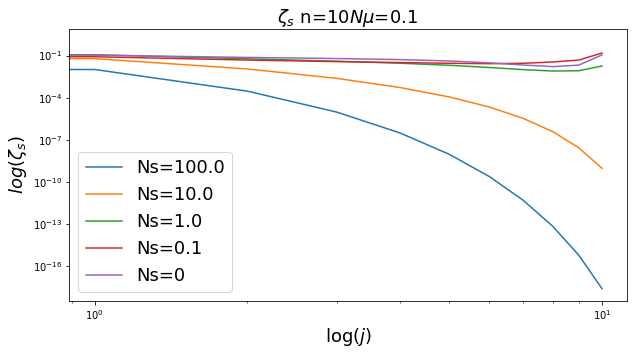

In [68]:
sel = [10**-2,10**-3,10**-4,10**-5,0]
n=10
pop_size = 10**4
mu = 10**-5
num_gen = 10**5
num_reps = 5

plt.figure(figsize=(10,5))
for s in sel:
    f = simulate(pop_size,mu,s,num_gen,num_reps)
    plot_sfs(f,n)
plt.legend(fontsize=18)
plt.show()

In [75]:
hsv = plt.get_cmap('hsv')

In [74]:
colors = hsv(np.linspace(0, 1.0, 5))

In [76]:
colors

array([[1.        , 0.        , 0.        , 1.        ],
       [0.51764558, 1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.96470316, 1.        ],
       [0.44705736, 0.        , 1.        , 1.        ],
       [1.        , 0.        , 0.09375   , 1.        ]])